# Titanic Überlebensvorhersage (ML-Einführung)

In [1]:
import pandas as pd

# Daten laden: Da die Datei im selben Ordner liegt, reicht der Dateiname
df = pd.read_csv('train.csv')

# Die ersten 5 Zeilen anzeigen:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Überblick über Spalten, Datentypen und fehlende Werte
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Statistische Zusammenfassung der numerischen Spalten
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Anzahl der Überlebenden (1) und Nicht-Überlebenden (0) nach Geschlecht
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

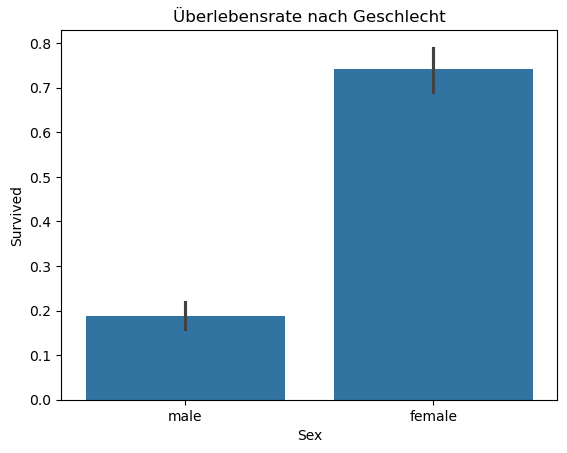

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstellen des Balkendiagramms, das die Überlebensrate (Survived) nach Geschlecht (Sex) zeigt
sns.barplot(x='Sex', y='Survived', data=df)

# Titel hinzufügen
plt.title('Überlebensrate nach Geschlecht')

# Diagramm anzeigen
plt.show()

## Explorative Datenanalyse (EDA): Wir untersuchen die Hauptfaktoren für das Überleben: Geschlecht, Klasse und Alter.

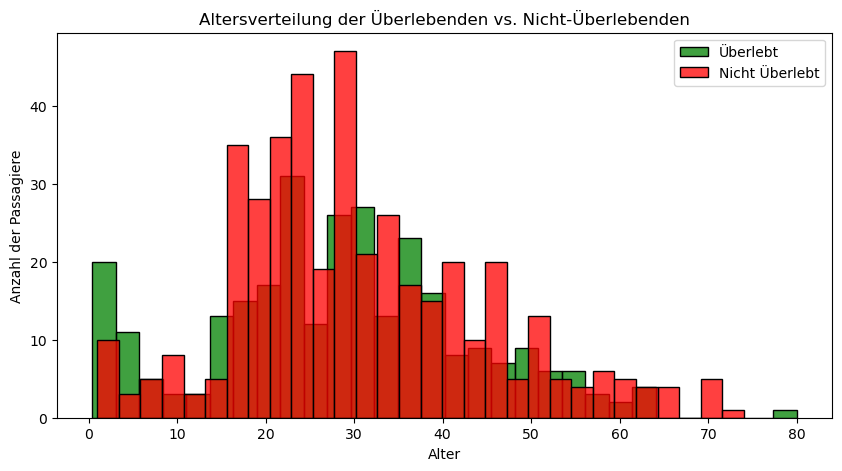

In [6]:
# Erstellen eines neuen Diagramms, das die Überlebensrate (Survived) nach Altersgruppe aufschlüsselt
# Wir verwenden hier 'Age' als Zahlenwert für die Y-Achse
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=False, color='green', label='Überlebt')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=False, color='red', label='Nicht Überlebt')

plt.title('Altersverteilung der Überlebenden vs. Nicht-Überlebenden')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Passagiere')
plt.legend()
plt.show()

## Explorative Datenanalyse (EDA): Wir untersuchen die Hauptfaktoren für das Überleben: Geschlecht, Klasse und Alter

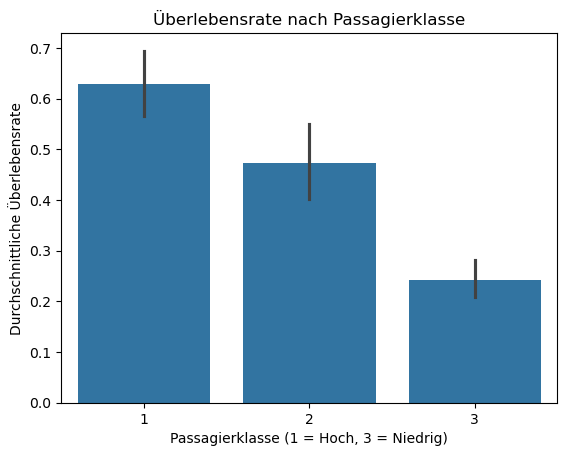

In [7]:
# Erstellen eines weiteren Balkendiagramms für die Überlebensrate nach Klasse
sns.barplot(x='Pclass', y='Survived', data=df)

plt.title('Überlebensrate nach Passagierklasse')
plt.xlabel('Passagierklasse (1 = Hoch, 3 = Niedrig)')
plt.ylabel('Durchschnittliche Überlebensrate')
plt.show()

Zusammenfassung der EDA: Die Analyse zeigt, dass 74% der Frauen und nur 19% der Männer überlebt haben. Die 1. Klasse hatte die höchste Überlebensrate

In [8]:
# Bessere Syntax: Berechnet den Mittelwert und weist ihn direkt der Spalte zu
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Überprüfen Sie, ob es noch fehlende Werte gibt (sollte 0 sein)
print("Fehlende Werte nach Korrektur (Age):", df['Age'].isnull().sum())

Fehlende Werte nach Korrektur (Age): 0


## Datenvorbereitung & Feature Engineering: Fehlende Werte werden mit dem Mittelwert/häufigsten Wert aufgefüllt. Kategoriale Daten (Text) werden in numerische Daten umgewandelt (get_dummies).

In [9]:
from sklearn.model_selection import train_test_split

# A. Fehlende Werte korrigieren
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Füllt fehlende 'Embarked'-Werte mit dem am häufigsten vorkommenden Wert auf
most_frequent_port = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_frequent_port)

In [10]:
# B. Text in Zahlen umwandeln (One-Hot-Encoding)
# Hier werden 'Sex' und 'Embarked' in die numerischen Spalten umgewandelt
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Wir wählen die Spalten aus, die wir für das Modell verwenden wollen
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

# Zeigen Sie die ersten 5 Zeilen an, um die neuen Spalten zu sehen
print("\nDatenrahmen mit neuen Feature-Spalten:")
print(df[features].head())


Datenrahmen mit neuen Feature-Spalten:
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True


In [11]:
from sklearn.model_selection import train_test_split

# Die Zielvariable (Was wollen wir vorhersagen?)
y = df['Survived']

# Die Features (Welche Daten nutzen wir zur Vorhersage?)
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features] # <--- Diese Zeile funktioniert jetzt!

# Teilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Trainingsdaten-Größe (Features): {X_train.shape}")
print(f"Testdaten-Größe (Features): {X_test.shape}")

Trainingsdaten-Größe (Features): (712, 8)
Testdaten-Größe (Features): (179, 8)


## Modellergebnis - Fazit: Das Decision Tree Modell erreichte eine Genauigkeit von 79% auf dem Testdatensatz. Dieses Projekt demonstriert die grundlegenden Schritte des Machine Learning Workflows: Daten-Exploration, Preprocessing und Klassifikation.

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialisierung des Modells
model = DecisionTreeClassifier(random_state=42)

# 2. Training: Das Modell lernt anhand der Trainingsdaten
model.fit(X_train, y_train)

# 3. Vorhersage: Das trainierte Modell wird auf die unbekannten Testdaten angewandt
y_pred = model.predict(X_test)

print("Modelltraining abgeschlossen und Vorhersagen erstellt.")

Modelltraining abgeschlossen und Vorhersagen erstellt.


In [13]:
from sklearn.metrics import accuracy_score

# Vergleich der echten Werte (y_test) mit den Vorhersagen (y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Genauigkeit des Entscheidungsbaum-Modells: {accuracy:.4f}")
print(f"Dies bedeutet, das Modell hat die Überlebenswahrscheinlichkeit in {round(accuracy * 100)}% der Fälle korrekt vorhergesagt.")

Genauigkeit des Entscheidungsbaum-Modells: 0.7933
Dies bedeutet, das Modell hat die Überlebenswahrscheinlichkeit in 79% der Fälle korrekt vorhergesagt.
